# 1. Import Libraries

In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
import librosa
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [3]:
def get_img(voice_data, sampling_data, mode):
    if mode == 'spec':
        stft = np.abs(librosa.core.spectrum.stft(voice_data))
        return librosa.amplitude_to_db(stft, ref=np.max)
    elif mode == 'mel':
        stft = np.abs(librosa.feature.melspectrogram(voice_data))
        return librosa.amplitude_to_db(stft, ref=np.max)
    elif mode == 'chrom':
        stft = np.abs(librosa.core.spectrum.stft(voice_data))
        return librosa.feature.chroma_stft(S=stft, sr=sampling_rate)

In [4]:
classes = ['cat', 'dog']

In [5]:
mode = 'mel'

width = 256
height = 32

X = np.empty([0, width*height])
y = np.empty([0, 1])

for _class in tqdm(classes):
    sound_path = glob('dataset/' + _class + '/*')
    for path in tqdm(sound_path):
        voice_data, sampling_rate = librosa.load(path)
        img = get_img(voice_data, sampling_rate, mode)
        img = cv2.resize(img, dsize=(width, height))
        img = img.reshape(1, -1)
        X = np.vstack([X, img])
        y = np.vstack([y, _class])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

# ### 3. Clean Data

# 4. Split Dataset into Training & Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## ### 5.3. Feature Scaling

# 6. Model Creation

## 6.1. Setting Parameters

In [7]:
clf = GaussianNB()

## 6.2. Train Model

In [8]:
clf.fit(X_train, y_train)

GaussianNB()

# 7. Prediction

## 7.1. Training Set

In [9]:
y_pred_train = clf.predict(X_train)

## 7.2. Test Set

In [10]:
y_pred_test = clf.predict(X_test)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

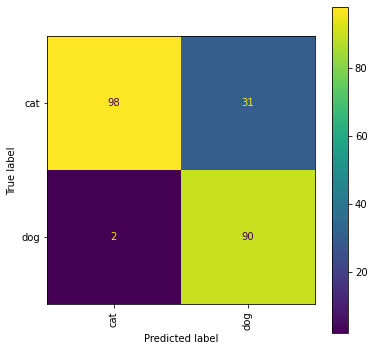

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_train, y_train, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.1.2. Scoring

In [12]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [13]:
print('accuracy =', report['accuracy'])

accuracy = 0.8506787330316742


In [14]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
cat,0.980000,0.759690,0.855895,129.000000
dog,0.743802,0.978261,0.845070,92.000000
accuracy,0.850679,0.850679,0.850679,0.850679
macro avg,0.861901,0.868975,0.850483,221.000000
weighted avg,0.881673,0.850679,0.851389,221.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

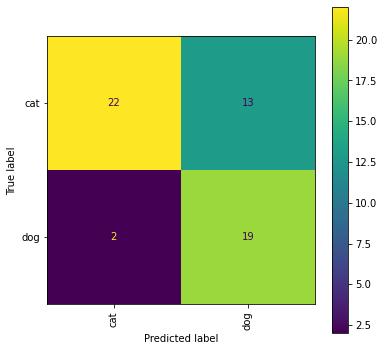

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.2.2. Scoring

In [16]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [17]:
print('accuracy =', report['accuracy'])

accuracy = 0.7321428571428571


In [18]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
cat,0.916667,0.628571,0.745763,35.000000
dog,0.593750,0.904762,0.716981,21.000000
accuracy,0.732143,0.732143,0.732143,0.732143
macro avg,0.755208,0.766667,0.731372,56.000000
weighted avg,0.795573,0.732143,0.734970,56.000000


# 9. Save Model

In [19]:
import pickle

In [20]:
pickle.dump((clf),  open('naive_bayes_model.pickle', 'wb'))